## Load Packages

In [186]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Create data

In [187]:
N = 100
P = 1
slope = 5
intercept = 2
X_train = np.random.normal(size=[N, P])
Y_train = X_train * slope + intercept

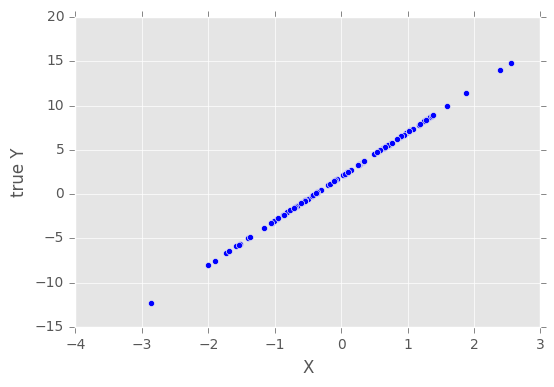

In [188]:
plt.scatter(X_train, Y_train)
plt.xlabel("X")
plt.ylabel("true Y")
plt.show()

## Define a graph of TensorFlow operations
We're going to supply some $x$ and $y$ and learn the parameters of the equation:

$$y=x \beta + b$$

In [156]:
# Define our data for training / evaluation.
# A tf.placeholder is a recipe for an input. Here, we say that each has the shape [None, 1]
# which means that we are going to provide an arbitrary number of inputs that each are one-dimensional.
x = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="x")
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="y")

# Define the model. This includes our variables (beta and b) and how they interact with our inputs.
# We'll initialize them to 0 (arbitrarily).
beta = tf.Variable(tf.zeros((1, 1)))
b = tf.Variable(tf.zeros((1, 1)))
Y_pred = tf.matmul(x, beta) + b

In [165]:
# Initialization to start using the graph we constructed
sess = tf.Session()
sess.run(tf.global_variables_initializer())

{'beta': array([[ 0.]], dtype=float32), 'b': array([[ 0.]], dtype=float32)}


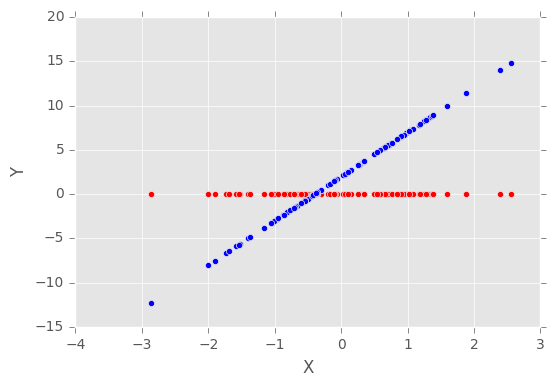

In [189]:
predicted = sess.run(Y_pred, feed_dict={x: X_train})
print(sess.run({"beta": beta, "b": b}))
plt.scatter(X_train, predicted, c="r")
plt.scatter(X_train, Y_train, c="b")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Really, we'd like to learn better values for beta and b so that our predictions get close to the real data.

In [209]:
# Define the MSE based on our input Y and prediction Y_pred
loss = tf.losses.mean_squared_error(labels=Y, predictions=Y_pred)
# Alternatively:
# loss = tf.reduce_mean((Y - Y_pred) ** 2)

# tf.gradients(loss, beta)


train_op = tf.train.GradientDescentOptimizer(learning_rate=0.15).minimize(loss)
# Alternatively:
#   train_op = tf.train.AdagradOptimizer...
#            = tf.train.AdamOptimizer...
#            = tf.train.RMSPropOptimizer...

# Alternatively^2:
#   optimizer_node = tf.train.GradientDescentOptimizer(learning_rate=0.25)
#   grads_and_vars = optimizer_node.compute_gradients(loss)
#     [Have fun with your gradients... see them, feel them, clip them, ...]
#   train_op = optimizer_node.apply_gradients(grads_and_vars)

## Training
To train (to find optimal values for the Variables in the graph), just run the training operation with some data:

In [257]:
# Initialization to start using the graph we constructed
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Before we do anything, we can see what different elements of the graph were initialized to.

In [258]:
beta_val, b_val = sess.run([beta, b])
print(beta_val[0, 0], b_val[0, 0])

(0.0, 0.0)


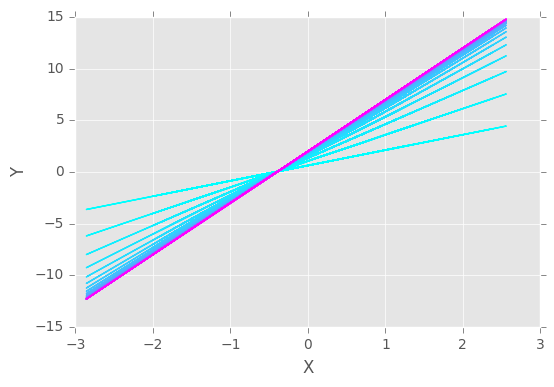

In [259]:
n_epochs = 30

color_idx = np.linspace(0, 1, n_epochs)
for i in xrange(n_epochs):
    sess.run(train_op, feed_dict={x: X_train, Y: Y_train})
    predictions = sess.run(Y_pred, feed_dict={x: X_train})
    plt.plot(X_train, predictions, color=plt.cm.cool(color_idx[i]))
plt.xlabel("X")
plt.ylabel("Y")
plt.show()